<a href="https://colab.research.google.com/github/TharaThankachan/Assignment_1_Sep/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1=df.set_index(['PassengerId'])

In [ ]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
df1.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

Handling missing values

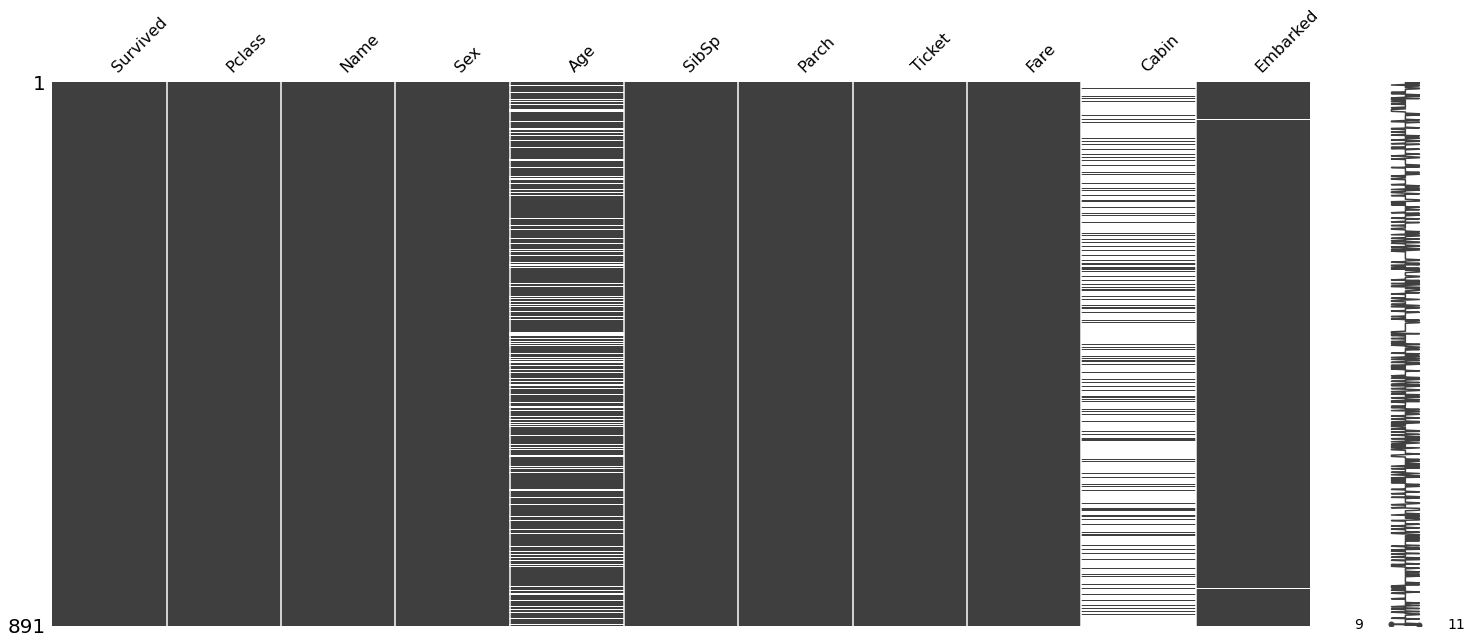

In [ ]:
import missingno as mn
mn.matrix(df1)

AGE

In [ ]:
df1['Age'].isna().sum()


177

In [ ]:
df1['Age']=df1['Age'].fillna(df1['Age'].median())
df1['Age'].isna().sum()

0

CABIN

In [ ]:
df1['Cabin'].isna().sum()

687

In [ ]:
df1['Cabin'].nunique()

147

In [ ]:
most_freq=df1['Cabin'].value_counts().index[0]
df1['most_freq']=df1['Cabin'].fillna(most_freq)

In [ ]:
df1['Cabin']=df1['most_freq']

In [ ]:
df1['Cabin'].isna().sum()

0

EMBARKED

In [ ]:
df1['Embarked'].isna().sum()

2

In [ ]:
df1['Embarked'].nunique()

3

In [ ]:
df1['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
most_fr=df1['Embarked'].value_counts().index[0]
df1['most_fr']=df1['Embarked'].fillna(most_fr)

In [ ]:
df1['Embarked']=df1['most_fr']
df1['Embarked'].isna().sum()

0

MANAGING OUTLIERS

AGE

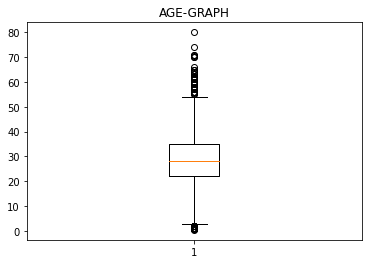

In [ ]:
plt.boxplot(df1['Age']
plt.title('AGE-GRAPH')
plt.show()

In [ ]:
Q1Age=df1['Age'].quantile(0.25)
Q3Age=df1['Age'].quantile(0.75)
IQR_Age=Q3Age-Q1Age
print('Q1',Q1Age)
print('Q3',Q3Age)
print('IQR',IQR_Age)

Q1 20.125
Q3 38.0
IQR 17.875


In [ ]:
Age_lower=Q1Age-1.5*IQR_Age
Age_upper=Q3Age+1.5*IQR_Age
print(Age_lower)
print(Age_upper)


-6.6875
64.8125


In [ ]:
Age_out=[]
for x in df1['Age']:
  if(x>Age_upper)|(x<Age_lower):
    Age_out.append(x)
print(Age_out)

[66.0, 65.0, 71.0, 70.5, 65.0, 65.0, 71.0, 80.0, 70.0, 70.0, 74.0]


In [ ]:
Age_index=df1[df1['Age']>Age_upper]
print(Age_index)

             Survived  Pclass                                  Name   Sex  \
PassengerId                                                                 
34                  0       2                 Wheadon, Mr. Edward H  male   
55                  0       1        Ostby, Mr. Engelhart Cornelius  male   
97                  0       1             Goldschmidt, Mr. George B  male   
117                 0       3                  Connors, Mr. Patrick  male   
281                 0       3                      Duane, Mr. Frank  male   
457                 0       1             Millet, Mr. Francis Davis  male   
494                 0       1               Artagaveytia, Mr. Ramon  male   
631                 1       1  Barkworth, Mr. Algernon Henry Wilson  male   
673                 0       2           Mitchell, Mr. Henry Michael  male   
746                 0       1          Crosby, Capt. Edward Gifford  male   
852                 0       3                   Svensson, Mr. Johan  male   

In [ ]:
df1.head(35)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,most_freq,most_fr
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,C23 C25 C27,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,C23 C25 C27,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S,C23 C25 C27,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,C23 C25 C27,Q,C23 C25 C27,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,C23 C25 C27,S,C23 C25 C27,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,C23 C25 C27,S,C23 C25 C27,S


In [ ]:
df1.drop([33,54,96,116,280,456,493,630,672,745,851],inplace=True)

In [ ]:
df1.head(35)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,most_freq,most_fr
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,C23 C25 C27,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,C23 C25 C27,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S,C23 C25 C27,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,C23 C25 C27,Q,C23 C25 C27,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,C23 C25 C27,S,C23 C25 C27,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,C23 C25 C27,S,C23 C25 C27,S


FARE

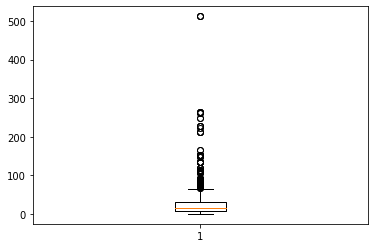

In [ ]:
plt.boxplot(df1['Fare'])
plt.show()

In [ ]:
Q1_Fare=df1['Fare'].quantile(0.25)
Q3_Fare=df1['Fare'].quantile(0.75)
IQR_Fare=Q3_Fare-Q1_Fare
print('Q1',Q1_Fare)
print('Q3',Q3_Fare)
print('IQR',IQR_Fare)

Q1 7.9177
Q3 31.06875
IQR 23.15105


In [ ]:
Fare_lower=Q1_Fare-1.5*IQR_Fare
Fare_upper=Q3_Fare+1.5*IQR_Fare
print(Fare_lower)
print(Fare_upper)

-26.808875000000004
65.795325


In [ ]:
Fare_out=[]
for x in df1['Fare']:
  if(x>Fare_upper)|(x<Fare_lower):
    Fare_out.append(x)
print(Fare_out)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [ ]:
Fare_index=df1['Fare']>Fare_upper
df1.loc[Fare_index].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [ ]:
df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,most_freq,most_fr
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,C23 C25 C27,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,C23 C25 C27,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S,C23 C25 C27,S


In [ ]:
df1.drop(71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6 ,134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]],inplace=True)

SyntaxError: ignored

siblings / spouses aboard the Titanic

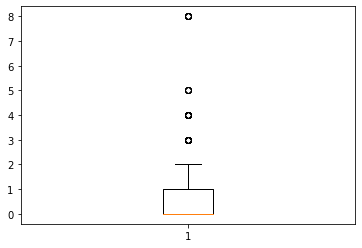

In [ ]:
plt.boxplot(df1['SibSp'])
plt.show()

In [ ]:
Q1_SibSp=df1['SibSp'].quantile(0.25)
Q3_SibSp=df1['SibSp'].quantile(0.75)
IQR_SibSp=Q3_SibSp-Q1_SibSp
print('Q1',Q1_SibSp)
print('Q3',Q3_SibSp)
print('IQR',IQR_SibSp)

Q1 0.0
Q3 1.0
IQR 1.0


In [ ]:
SibSp_lower=Q1_SibSp-1.5*IQR_SibSp
SibSp_upper=Q3_SibSp+1.5*IQR_SibSp
print(SibSp_lower)
print(SibSp_upper)

-1.5
2.5


In [ ]:
SibSp_out=[]
for x in df1['SibSp']:
  if(x>SibSp_upper)|(x<SibSp_lower):
     SibSp_out.append(x)
print(SibSp_out)


[3, 4, 3, 3, 4, 5, 3, 4, 5, 3, 3, 4, 8, 4, 4, 3, 8, 4, 8, 3, 4, 4, 4, 4, 8, 3, 3, 5, 3, 5, 3, 4, 4, 3, 3, 5, 4, 3, 4, 8, 4, 3, 4, 8, 8]


In [ ]:
SibSp_index=df1['SibSp']>SibSp_upper
df1.loc[SibSp_index].index

Int64Index([  8,  17,  25,  28,  51,  60,  64,  69,  72,  86,  89, 120, 160,
            165, 172, 177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342,
            375, 387, 410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788,
            793, 814, 820, 825, 847, 864],
           dtype='int64', name='PassengerId')

In [ ]:
df1.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,most_freq,most_fr
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,C23 C25 C27,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S,C23 C25 C27,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C23 C25 C27,S,C23 C25 C27,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,C23 C25 C27,Q,C23 C25 C27,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,C23 C25 C27,S,C23 C25 C27,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,C23 C25 C27,S,C23 C25 C27,S


In [ ]:
df1.drop([7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],inplace=True)

In [ ]:
df1.head(10)

MIN MAX SCALING

In [ ]:
x=df1.drop('Survived',axis=1)
y=df1['Survived']
from sklearn.model_selection import train_test_split


In [ ]:
from traitlets.traitlets import describe
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,834.000000,668.000000,834.000000,834.000000,834.000000
mean,2.314149,29.828099,0.534772,0.387290,32.425064
std,0.837085,14.515232,1.119237,0.816917,50.288403
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.458300
75%,3.000000,39.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
min_max=MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

ValueError: ignored

In [3]:
d=pd.read_csv('/content/titanic_dataset.csv')

In [8]:
d.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [12]:
x=d
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
x=mms.fit_transform(x)
x=pd.DataFrame(x,columns=['PassengerId','Survived','Pclass','Age','SibSp','Parch','Fare'])
x.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.500000,0.383838,0.654321,0.367921,0.065376,0.063599,0.062858
std,0.289162,0.486592,0.418036,0.182540,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.500000,0.247612,0.000000,0.000000,0.015440
50%,0.500000,0.000000,1.000000,0.346569,0.000000,0.000000,0.028213
75%,0.750000,1.000000,1.000000,0.472229,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
x.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.000000,0.0,1.0,0.271174,0.125,0.0,0.014151
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469
3,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644
4,0.004494,0.0,1.0,0.434531,0.000,0.0,0.015713


In [14]:
x.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
886,0.995506,0.0,0.5,0.334004,0.000,0.000000,0.025374
887,0.996629,1.0,0.0,0.233476,0.000,0.000000,0.058556
888,0.997753,0.0,1.0,NaN,0.125,0.333333,0.045771
889,0.998876,1.0,0.0,0.321438,0.000,0.000000,0.058556
890,1.000000,0.0,1.0,0.396833,0.000,0.000000,0.015127
